<a href="https://colab.research.google.com/github/BrianChegeGichau/hypothesistesting/blob/master/Autolib_ElectricCar_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Am working as a Data Scientist for an Autotib electric car sharing service company to investigate claims about the dataset on weekdays.

The dataset contains 16,085 rows and 13 columns. The dataset contains information about the date picked, and the day picked, taken and returned of the three electric cars. The electric cars are named as the Blue Cars, Utilib Cars and the Utilib 14 Cars.

I'll be working with the Blue cars as my area of interest.

I'll be proving two claims about the data provided by creating the null and alternative hypothesis. The following hypotheses can be used in resource allocation and marketing strategy of the company. 

I'll do hypothesis testing on claims made that are the mean number of cars taken on Monday are different from the ones taken on Friday.

The following analysis was done in Python language and defines what is done in the notebook
  - Find and deal with outliers, anomalies and missing data within the dataset.
  - Plotting appropriate univariate and bivariate summaries recording the observations noted.
  - Implement the solution by performing hypothesis testing.

In [ ]:
#The libraries neccessary for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the csv file of our dataset and printing out the head.
autolib_df=pd.read_csv('autolib_daily_events_postal_code.csv')
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Finding out the number of rows and columns in our dataset.
autolib_df.shape

(16085, 13)

In [ ]:
#I'll be working with the weekdays in my analysis. Hence i'll create a new dataframe with the weekdays only naming it as weekdays.
weekdays=autolib_df[autolib_df['day_type']=='weekday']
weekdays.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#The explanation of the column variables.
explanation=pd.read_excel('columns_explanation.xlsx')
explanation

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#Finding more about the dataset
weekdays.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1430.007277,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,36.882140,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,1440.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


I'll be working with the BlueCars_taken_sum column which shows the number of blue cars taken that date and in that area.

# Data Cleaning Process.

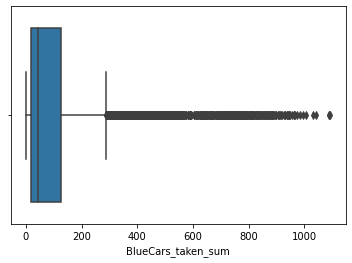

In [ ]:
#Checking for Outliers in our BlueCars_taken_sum column.
sns.boxplot(x=weekdays['BlueCars_taken_sum'])
#There are outliers in our dataset hence the need to remove them.

In [ ]:
#Removing the outliers using the z score.
z_score=stats.zscore(weekdays['BlueCars_taken_sum'])
abs_z_scores = np.abs(z_score)
filtered_entries=(abs_z_scores<3)
weekday=weekdays[filtered_entries]
weekday.shape

(11226, 13)

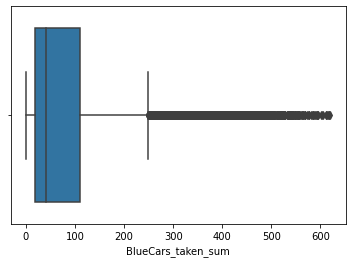

In [ ]:
#Confirming if there are any outliers in our dataset.
sns.boxplot(x=weekday['BlueCars_taken_sum'])


In [ ]:
#Finding more information about the dataset
weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11226 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             11226 non-null  int64 
 1   date                    11226 non-null  object
 2   n_daily_data_points     11226 non-null  int64 
 3   dayOfWeek               11226 non-null  int64 
 4   day_type                11226 non-null  object
 5   BlueCars_taken_sum      11226 non-null  int64 
 6   BlueCars_returned_sum   11226 non-null  int64 
 7   Utilib_taken_sum        11226 non-null  int64 
 8   Utilib_returned_sum     11226 non-null  int64 
 9   Utilib_14_taken_sum     11226 non-null  int64 
 10  Utilib_14_returned_sum  11226 non-null  int64 
 11  Slots_freed_sum         11226 non-null  int64 
 12  Slots_taken_sum         11226 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.2+ MB


In [ ]:
#I replaced the day code with their respective names.
encode={'dayOfWeek': {0 : "Monday", 1 : "Tuesday", 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday'}}
weekday.replace(encode, inplace=True)
weekday.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Checking for null values in the dataset
weekday.isna().sum()
#I found that the dataset does not contain any null values.

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#Checking for duplicated rows in the dataset
weekday.duplicated().sum()
#There were no duplicated rows in the dataset

0

In [ ]:
#standardizing the column names
weekday.columns=weekday.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
weekday.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,3,3,6,6,18,20


# Data Analysis.

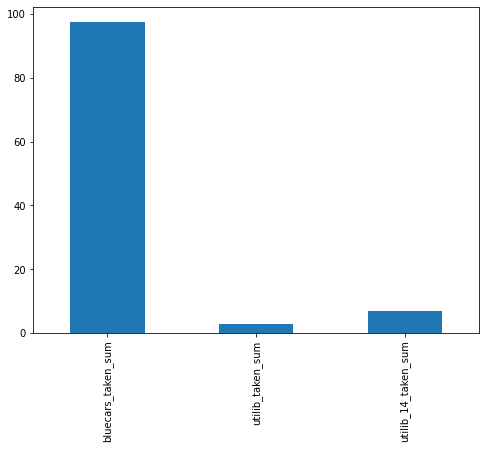

In [ ]:
#Plotting the mean number of electric cars taken
weekday[['bluecars_taken_sum','utilib_taken_sum','utilib_14_taken_sum']].mean().plot(kind='bar',figsize=(8,6),stacked=True)
#It is significant that BlueCars happen to be the cars taken the most.

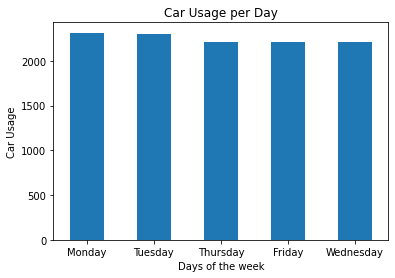

In [ ]:
#Plotting the car usage per day 
weekday.dayofweek.value_counts().plot(kind='bar',rot=0)
plt.xlabel('Days of the week')
plt.ylabel('Car Usage')
plt.title('Car Usage per Day')
plt.show()
#There seems to be no significant difference in usage overally throughout the week.

I would like to prove that indeed cars are taken on Monday are not equal to the ones taken on Friday. This challenges the fact that Mondays happen to be the days most people go to work and would use the car share service more. Therefore I need sufficient evidence to prove that hypothesis.

In [ ]:
#Printing out the days with the respective car usage
days=weekday['bluecars_taken_sum'].groupby(weekday['dayofweek']).mean().sort_values(ascending=False)
days

dayofweek
Friday       105.894331
Thursday      97.425657
Wednesday     96.619782
Monday        94.753567
Tuesday       92.586162
Name: bluecars_taken_sum, dtype: float64

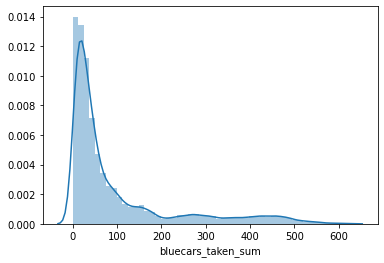

In [ ]:
#The usage of Blue Cars seems to take a normal distribution 
sns.distplot(weekday['bluecars_taken_sum'])
plt.show()

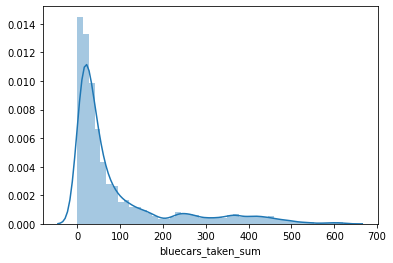

In [ ]:
sns.distplot(mondays['bluecars_taken_sum'])
plt.show()

In [ ]:
# I created a new dataset with Mondays only to use it as my population.
mondays=weekday[weekday['dayofweek']=='Monday']
mondays.shape

(2313, 13)

In [ ]:
fridays=weekday[weekday['dayofweek']=='Friday']
fridays.shape

(2205, 13)

In [ ]:
#Finding out the sample size we are going to be using for the analysis.
monday_population_size=mondays.shape[0]
monday_sample=int(0.1*monday_population_size)
print("The sample size is: ", monday_sample)

The sample size is:  231


In [ ]:
#Finding out the sample size we are going to be using for the analysis for
friday_population_size=fridays.shape[0]
friday_sample=int(0.1*friday_population_size)
print("The sample size is: ", friday_sample)

The sample size is:  220


In [ ]:
#Here we are picking the sample that we are going to work with in our analysis.
#To ensure that the sample selected remains the same I used the numpy random seed.
np.random.seed(500)
monday_sample_data=mondays.sample(n=monday_sample, replace='False')
monday_sample_data

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6861,92260,1/1/2018,1440,Monday,weekday,22,19,0,2,1,1,0,0
1856,75012,6/4/2018,1440,Monday,weekday,376,399,15,16,29,32,110,110
1953,75013,3/26/2018,1439,Monday,weekday,456,456,18,19,26,17,128,121
4373,92000,1/8/2018,1438,Monday,weekday,120,124,6,5,11,14,0,0
6148,92210,3/12/2018,1440,Monday,weekday,82,72,0,1,8,10,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8639,92380,3/19/2018,1440,Monday,weekday,27,30,0,1,1,0,0,0
9165,92410,5/28/2018,1440,Monday,weekday,6,11,0,0,3,3,0,0
8469,92370,3/5/2018,1440,Monday,weekday,17,24,1,1,1,1,0,0
4907,92120,3/19/2018,1440,Monday,weekday,64,69,2,3,5,3,0,0


In [ ]:
#Here we are picking the sample that we are going to work with in our analysis.
#To ensure that the sample selected remains the same I used the numpy random seed.
np.random.seed(500)
friday_sample_data=fridays.sample(n=friday_sample, replace='False')
friday_sample_data

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
7212,92290,2/9/2018,1439,Friday,weekday,10,13,0,0,0,0,0,0
1936,75013,3/9/2018,1440,Friday,weekday,557,572,21,18,31,26,139,141
2039,75014,1/12/2018,1439,Friday,weekday,515,498,16,18,32,34,117,114
4607,92100,3/30/2018,1434,Friday,weekday,362,338,6,7,19,22,12,12
6457,92230,3/9/2018,1440,Friday,weekday,48,56,3,4,5,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,75009,3/23/2018,1440,Friday,weekday,347,345,16,16,24,25,98,97
2656,75018,1/5/2018,1440,Friday,weekday,392,387,11,10,20,21,94,96
472,75004,1/5/2018,1440,Friday,weekday,194,203,5,5,16,17,39,39
9064,92410,2/2/2018,1440,Friday,weekday,23,22,2,2,0,0,0,0


In [ ]:
#Finding out the point estimate of our population.
point_estimate_population=stats.norm.rvs(loc=mondays['bluecars_taken_sum'].mean(), scale=1)
point_estimate_population

94.84276634268836

In [ ]:
#Finding out the point estimate of our population.
point_estimate_sample=stats.norm.rvs(loc=monday_sample_data['bluecars_taken_sum'].mean(),scale=1)
point_estimate_sample

92.30917672504347

In [ ]:
#Finding out the variation of the population point estimate and the sample point estimate.
point_estimate_population-point_estimate_sample
#I found out that there is a 2 point variation of our means which was rather small compared to other sample sizes I chose.

2.5335896176448927

In [ ]:
#Here am finding out the possible interval of our population mean which happens to be between 92 and 102.
standard_error=mondays['bluecars_taken_sum'].std()/np.sqrt(sample)

stats.norm.interval(0.95, loc=mondays['bluecars_taken_sum'].mean(), scale=standard_error)
#We are 95% sure of our mean which falls between 89 and 99 in concur with my previous point estimate.

(89.54156216276051, 99.96557142997618)

In [ ]:
#Here am finding out the possible interval of our population mean which happens to be between 87 and 124.
standard_error=fridays['bluecars_taken_sum'].std()/np.sqrt(friday_sample)

stats.norm.interval(0.95, loc=fridays['bluecars_taken_sum'].mean(), scale=standard_error)

(87.53904117912144, 124.24962095239785)

Since our distribution seemed to take a fairly sharp normal distribution, I decided to fit a proper normal distribution in our BlueCar taken values to enjoy the benefits of a normal distribution more like a fairly bell-curve shape and a few standard deviations around the mean which enables better analysis.

In [ ]:
#Fitting the parameters of the mean of 0 and a standard deviation of 1
from scipy.stats import norm

parameters=norm.fit(mondays['bluecars_taken_sum'])

parameter=norm.fit(monday_sample_data['bluecars_taken_sum'])

In [ ]:
#Fitting the parameters of the mean of 0 and a standard deviation of 1 for the Friday population
from scipy.stats import norm

parameters_friday=norm.fit(fridays['bluecars_taken_sum'])

parameter_friday=norm.fit(friday_sample_data['bluecars_taken_sum'])

In [ ]:
x=np.linspace(-5,5,100)

In [ ]:
#I generated a normal distribution of our bluecars taken column.
fitted_pop_pdf=norm.pdf(x, loc=parameters[0], scale=parameters[1])
fitted_sample_pdf=norm.pdf(x, loc=parameter[0], scale=parameter[1])

fitted_friday_pop_pdf=norm.pdf(x, loc=parameters_friday[0], scale=parameters[1])
fitted_friday_sample_pdf=norm.pdf(x, loc=parameter_friday[0], scale=parameter[1])


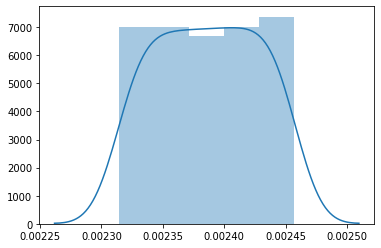

In [ ]:
#Plotting the distribution of the curve.
sns.distplot(fitted_pop_pdf)
##The distribution since to takes a fairly normal curve hence ready for the hypothesis testing.

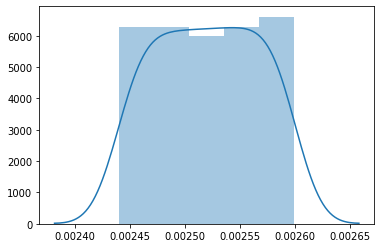

In [ ]:
#Plotting the distribution of the curve.
sns.distplot(fitted_sample_pdf)
##The distribution since to takes a fairly normal curve hence ready for the hypothesis testing.

Since the sample was fairly huge I decided to use the z-test which also fits well with the distribution of the data.

In [ ]:
#I manually calculated the z-test and used the alpha level at 0.05
from math import sqrt as s
fitted_mean=fitted_pop_pdf.mean()
fitted_sample_mean=fitted_sample_pdf.mean()
fitted_sd=fitted_pop_pdf.std()
#Calculating the sample mean for the friday population
fitted_friday_mean=fitted_friday_pop_pdf.mean()
fitted_friday_sample_mean=fitted_friday_sample_pdf.mean()


# Since it was a two tailed test we are going to use alpha at 0.025 for the test.
alpha=0.025

statistic = (fitted_friday_sample_mean - fitted_mean)/(fitted_sd/s(friday_sample))
print('The test statistic is', statistic)

The test statistic is -39.85490037146805


In [ ]:
#I used the test statistic in calculating the p-value.
p_value = stats.norm.sf(abs(statistic))*2
print(" The p value is ", p_value)

 The p value is  0.0


In [ ]:
if p_value<alpha:
  print('Reject the Null Hypothesis')
if p_value> alpha:
  print('Fail to reject the Null Hypothesis') 

Reject the Null Hypothesis


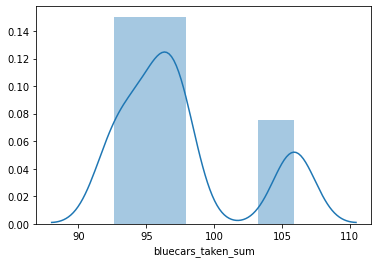

In [ ]:
#The usage of cars throughout the week seems to be bi-modal.
sns.distplot(weekday['bluecars_taken_sum'].groupby(weekday['dayofweek']).mean())

This proves that indeed there is sufficient evidence to reject the null hypothesis. Mondays have a less number of clients than the Fridays. This is proved by the graph above to show that there are two modes in the week but with one smaller one.

         H₀ :μ(Monday) = μ(Friday)    
         H₁ :μ(Monday) ≠ μ(Friday)

Our alternative hypothesis was true and indeed the number of cars on Monday are not equal to the number of cars on Friday. This can be used in resource allocation in terms of marketing and car allocations. Friday needs more resources.